In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Defining SVM class
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    # Sigmoid function
    def predict(self, X):
        approximation = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))
        return approximation(np.dot(X, self.w) - self.b)

    def predict_class(self, X):
      return np.where(self.predict(X) >= 0.5, 1, -1)

In [32]:
# Generate random sample data
np.random.seed(42)

# Class -1
X_neg = np.random.randn(25, 2) - 2
y_neg = -1 * np.ones(25)

# Class 1
X_pos = np.random.randn(25, 2) + 2
y_pos = np.ones(25)

# Combining the data
X = np.vstack((X_neg, X_pos))
y = np.hstack((y_neg, y_pos))

In [33]:
# Adding noise by flipping the labels of a few points
noise_factor = 0.05  # 10% noise
num_noisy_points = int(noise_factor * len(y))
noisy_indices = np.random.choice(len(y), size=num_noisy_points, replace=False)
y[noisy_indices] = -y[noisy_indices]

In [34]:
# Train the SVM model
svm = SVM()
svm.fit(X, y)

In [35]:
# Making predictions
predictions = svm.predict_class(X)

# Classification report
print("Classification Report:")
print(classification_report(y, predictions))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      1.00      0.96        23
         1.0       1.00      0.93      0.96        27

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [36]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))

Confusion Matrix:
[[23  0]
 [ 2 25]]


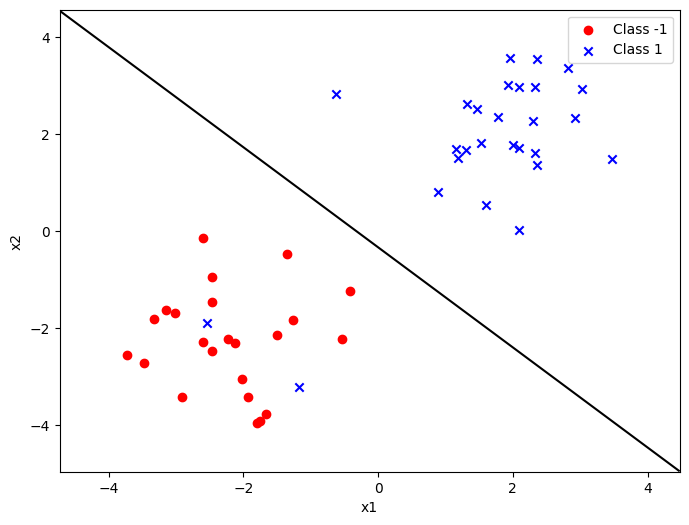

In [37]:
# Extracting data for plotting
x1 = X[:, 0]
x2 = X[:, 1]

# Create a figure and scatter plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x1[y == -1], x2[y == -1], color='red', marker='o', label='Class -1')
plt.scatter(x1[y == 1], x2[y == 1], color='blue', marker='x', label='Class 1')

# Plot the decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0.5], colors='k', linestyles='-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()
